# Exercise 9. Web Analytics

## Text, Web and Social Media Analytics Lab

In this exercise,we will use the Online Shopper's Intention [dataset](https://www.kaggle.com/roshansharma/online-shoppers-intention) from Kaggle. It covers 12,330 sessions and contains multiple web metrics, some technical details such as 'operating system' and whether a session generated revenue or not. 

We import all the necessary libraries and packages required.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import distplot
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

We load our dataset and show its head to understand how the data looks like. 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TWSM Analytics Lab/storage/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


We remove all NA values from our dataset and we print the before and after to see how many rows were removed.

In [3]:
print('Before Removing NAs: {}'.format(len(df)))

df.dropna(axis=0, inplace=True)
print('After Removing NAs: {}'.format(len(df)))

Before Removing NAs: 12330
After Removing NAs: 12316


We check the minimums and maximums for all numerical values to see if there are any outliers, where we actually see that the column 'ProductRelated_Duration' has a minimum duration of -1 and a maximum duration of over 60,000.

In [4]:
df.describe().loc[['min', 'max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,-1.00,0.0,-1.000,0.0,-1.00000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,27.0,3398.75,24.0,2549.375,705.0,63973.52223,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


We remove the outliers we mentioned before and end up with a minimum 'ProductRelated_Duration' of 0 and a maximum 'ProductRelated_Duration' of around 8700, which seems to be possible.

In [5]:
df = df[(df['ProductRelated_Duration'] >= 0) & (df['ProductRelated_Duration'] <= df['ProductRelated_Duration'].quantile(.99))]
df.describe().loc[['min', 'max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,24.0,2720.5,16.0,2252.033333,351.0,8699.407065,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


We plot several distribution plots to understand the relationship that some variables might have over the 'Revenue'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

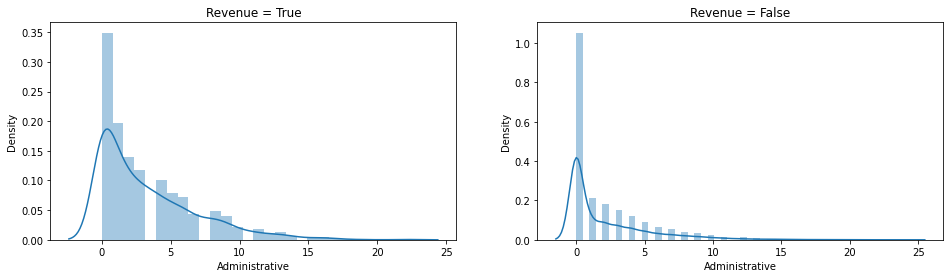

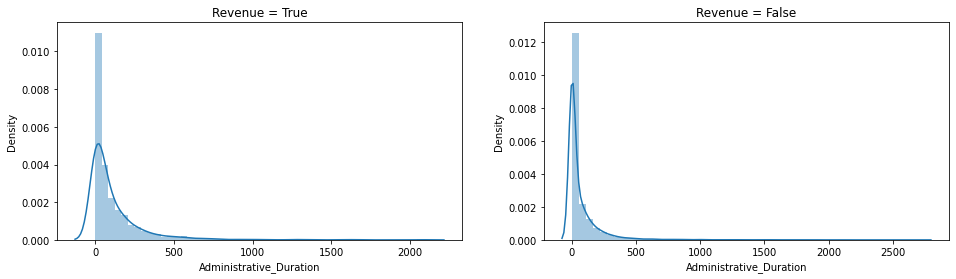

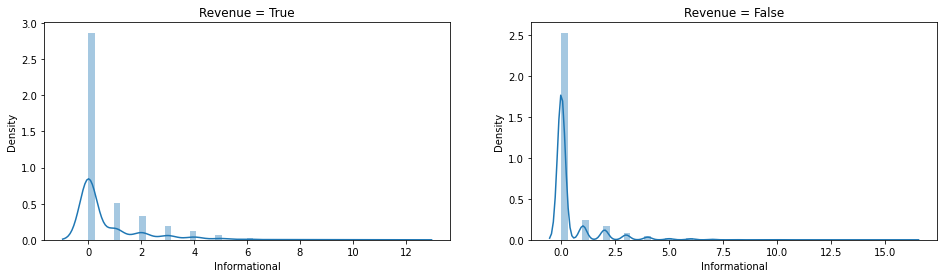

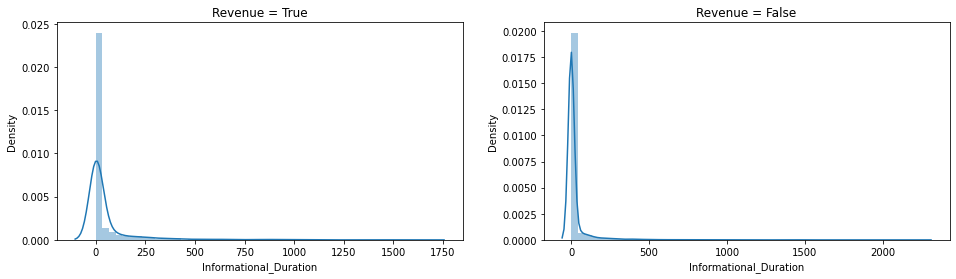

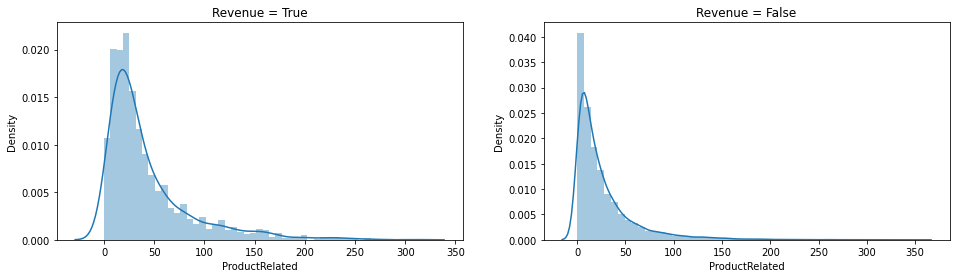

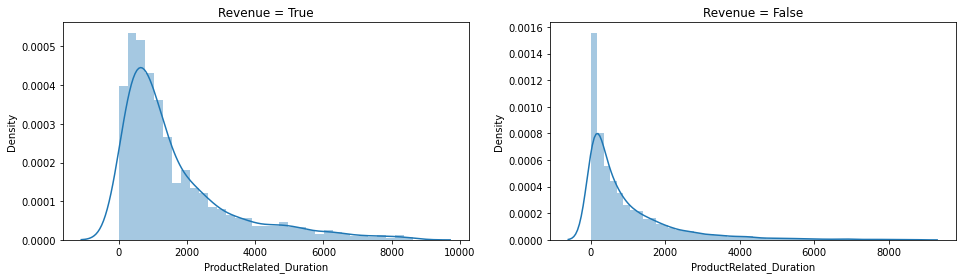

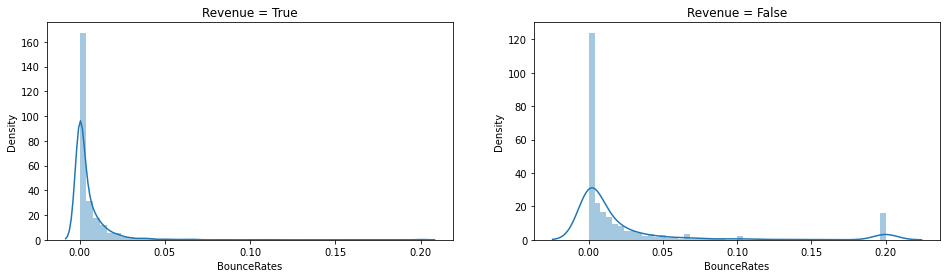

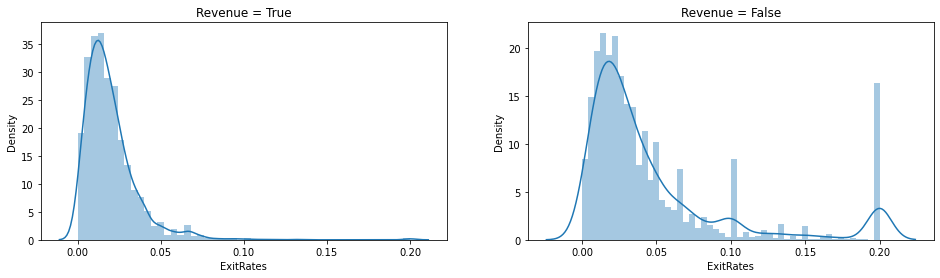

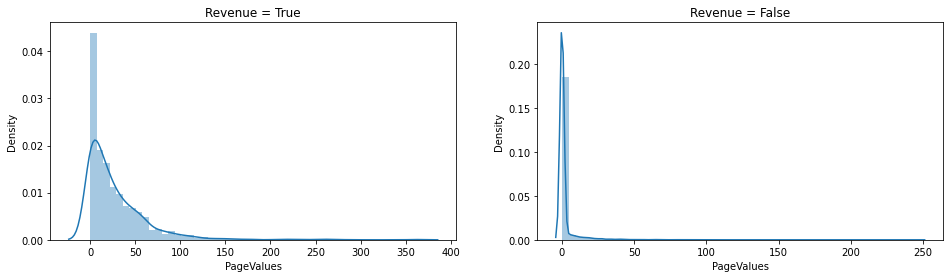

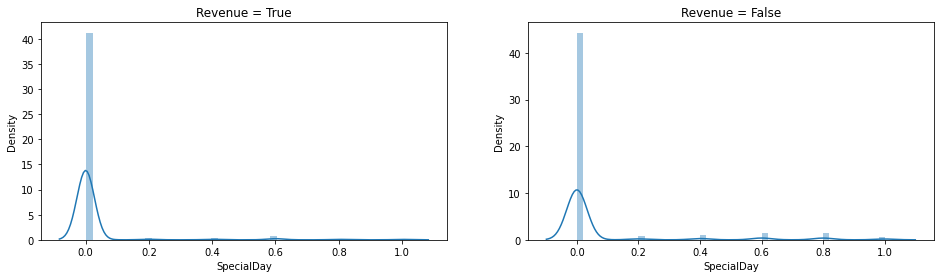

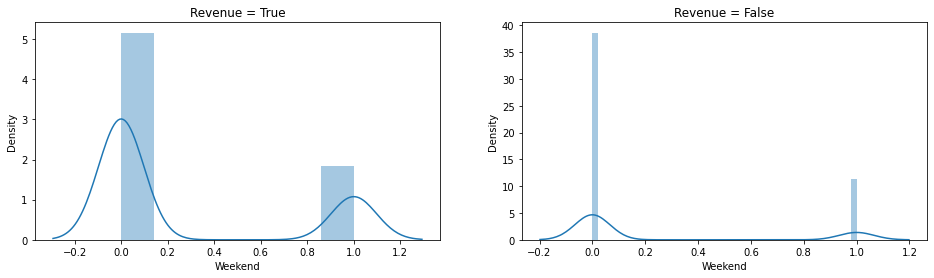

In [6]:
x_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend']

df_revenue = df[df['Revenue'] == True]
df_no_revenue = df[df['Revenue'] == False]

for var in x_vars:
  fig, ax = plt.subplots(1,2, figsize=(16,4))
  distplot(df_revenue[var], ax=ax[0])
  distplot(df_no_revenue[var], ax=ax[1])
  ax[0].set_title('Revenue = True')
  ax[1].set_title('Revenue = False')

We convert all non-numerical values to a one-hot encoding so we can use all variables for our model, specifically the previous 'Month' and 'VisitorType' columns. We show the head of our transformed dataset to see how the new data looks like.

In [7]:
data1 = pd.get_dummies(df)
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1


We split our data into train and test set, specifically using 'Revenue' as our target variable and a test size of 20%. We then print the shape of the resulting splits. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop('Revenue', axis=1), data1['Revenue'], test_size=0.20, random_state=12)

print('Dataset: {}\nX_train: {}\nX_test: {}\ny_train: {}\ny_test: {}'.format(data1.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dataset: (12159, 29)
X_train: (9727, 28)
X_test: (2432, 28)
y_train: (9727,)
y_test: (2432,)


We want to train a Random Forest Classifier to predict on our data and use a GridSearchCV to find the best hyperparameters for our model. So, we first create a parameter grid that includes the parameter we want to test and then we define the classifier. We then create the GridSearchCV using our Random Forest model and the parameter grid we previously defined; finally, we train the models. 

In [9]:
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10, 50, 100, 200, 300, 1000]}
rf = RandomForestClassifier(random_state=12)

cv = GridSearchCV(rf, param_grid=param_grid)
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=12,
                               

After the best model has been found, we print the train and test accuracy, as well as the classification report to see how our model performed. We see that the model performed really well with 'Revenue' as False, but not so well with 'Revenue' as True. This might be due to the unbalanced dataset; however, the overall performance of the model is not so bad. 

In [10]:
train_accuracy = cv.score(X_train, y_train)
test_accuracy = cv.score(X_test, y_test)
y_pred = cv.predict(X_test)

print('Training Accuracy: {}\nTest Accuracy: {}\n\n{}'.format(round(train_accuracy, 4), round(test_accuracy, 4), classification_report(y_test, y_pred)))

Training Accuracy: 0.9477
Test Accuracy: 0.9112

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2073
        True       0.78      0.55      0.65       359

    accuracy                           0.91      2432
   macro avg       0.85      0.76      0.80      2432
weighted avg       0.90      0.91      0.90      2432



We create a dataframe with the feature importances found in our model, where we can see that 'PageValues' has the highest. We can check these results with the distribution plots from before to see if these values make sense. 

In [11]:
pd.DataFrame(cv.best_estimator_.feature_importances_, index=data1.drop('Revenue', axis=1).columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
PageValues,0.507211
ProductRelated_Duration,0.076545
ExitRates,0.074115
ProductRelated,0.060181
BounceRates,0.044734
Administrative_Duration,0.042978
Administrative,0.034864
Month_Nov,0.026043
TrafficType,0.020221
Region,0.019130
